<a href="https://colab.research.google.com/github/YugankDabas/Crop_Price_Prediction/blob/main/crop_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#importing the dataset
dataset = pd.read_csv('/content/crop_price_encoded.csv')

In [ ]:
dataset.head(5)

,Arrivals (Tonnes),Min Price (Rs./Quintal),Max Price (Rs./Quintal),State Name_Haryana,State Name_Punjab,State Name_Uttar Pradesh,State Name_Uttrakhand,District Name_Amritsar,District Name_Gurgaon,District Name_Haridwar,...,Variety_Desi,Variety_Hybrid,Variety_Local,Variety_Other,Variety_Potato,Variety_Tomato,Crop_Potato,Crop_Tomato,Crop_Wheat,Modal Price (Rs./Quintal)
0,6,3200,4200,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,3600
1,7,700,1000,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,800
2,7,800,1000,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,900
3,7,2000,2800,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,2400
4,8,600,800,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,700


In [ ]:
#Data Preprocessing
x = dataset.iloc[ : , :-1].values
y = dataset.iloc[ : , -1].values

In [ ]:
print(x)
print(y)

[[   6 3200 4200 ...    0    1    0]
 [   7  700 1000 ...    0    1    0]
 [   7  800 1000 ...    0    1    0]
 ...
 [  23 2290 2340 ...    0    0    1]
 [  25 2290 2315 ...    0    0    1]
 [  32 2340 2410 ...    0    0    1]]
[3600  800  900 ... 2305 2300 2370]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#build the ANN
ann = tf.keras.models.Sequential()

In [ ]:
# layer-1
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [ ]:
#layer-2
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [ ]:
# layer-3
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [ ]:
# layer-4
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [ ]:
# output-layer
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
# compile
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])
print(ann.summary)

<bound method Model.summary of <Sequential name=sequential, built=False>>


In [ ]:
# train
history = ann.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=1000,
    batch_size=32,
    verbose=1
)

Epoch 1/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 2332050.2500 - mae: 1202.1453 - val_loss: 33151.7344 - val_mae: 104.3454
Epoch 2/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 27506.9883 - mae: 90.1687 - val_loss: 18677.2070 - val_mae: 71.5209
Epoch 3/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18015.9375 - mae: 67.6419 - val_loss: 18166.8105 - val_mae: 61.5560
Epoch 4/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 17546.2480 - mae: 67.6772 - val_loss: 17630.1406 - val_mae: 68.6088
Epoch 5/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 17813.9355 - mae: 68.0638 - val_loss: 18643.5938 - val_mae: 71.9730
Epoch 6/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16925.9570 - mae: 67.3446 - val_loss: 17203.1562 - val_mae: 67.2819
Epoch 7/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17313.4023 - mae: 67.7255 - val_loss: 18157.7539 - val_mae: 60.9047
Epoch 8/1000
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 16737.8457 - mae: 67.96

In [17]:
y_pred = ann.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[1977.99 2000.  ]
 [2341.63 2350.  ]
 [ 825.97  800.  ]
 ...
 [1707.5  1800.  ]
 [1088.13 1080.  ]
 [ 773.54  700.  ]]


In [18]:
#Evaluate the model
loss, mae = ann.evaluate(x_test, y_test)
print(f"\n📉 Test Loss (MSE): {loss:.2f}")
print(f"📈 Test MAE: {mae:.2f}")

#Save the model
ann.save("crop_price_ann_model.h5")
print("✅ Model saved as 'crop_price_ann_model.h5'")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4106.0444 - mae: 30.0700



📉 Test Loss (MSE): 4390.35
📈 Test MAE: 29.90
✅ Model saved as 'crop_price_ann_model.h5'


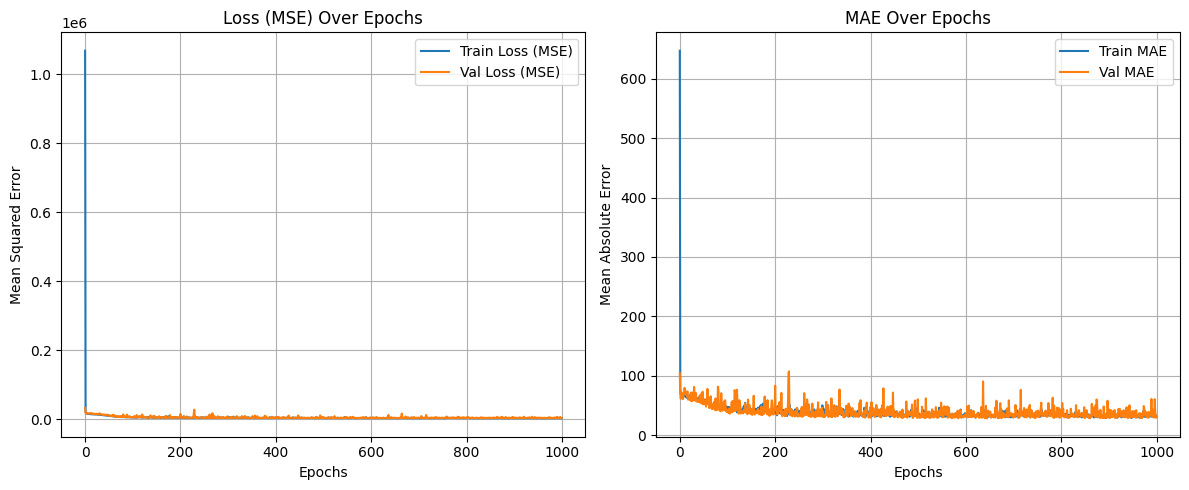

In [19]:
#Plot Loss and MAE over Epochs
plt.figure(figsize=(12, 5))

#Plot MSE Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
plt.title('Loss (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)

#Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()